# Introduction
Based on stuf by Michael Droettboom (Space Telescope Science Institute)
- http://github.com/dmcdougall/strata-mpl-tutorial 

Matplotlib is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats.

![Parts of a figure](matplotlib-anatomy.png)

Most of the terms are straightforward but the main thing to remember is that the `Figure` is the final image that may contain 1 or more axes. The `Axes` represent an individual plot.

In [1]:
# use the 'tk' backend so plots come up in windows
%matplotlib tk
# use default settings 
from matplotlib import rcdefaults
rcdefaults()

# Basic Plots

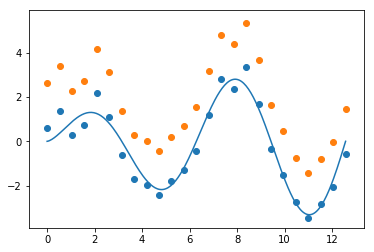

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

X_data  = np.linspace(0, 4.*np.pi, 25)
y_data = f(X_data, noise_amount=0.5)

X_plot = np.linspace(0, 4.*np.pi, 250)
y_plot = f(X_plot, noise_amount=0.)

# Below we set up a basic figure 

plt.figure()
plt.scatter(X_data , y_data)
plt.scatter(X_data , y_data  + 2.)
plt.plot(X_plot, y_plot)

plt.show()

Let's make our x axis a bit more meaningul, and add some labels:

In [ ]:
plt.figure()
plt.scatter(X_data , y_data)
plt.scatter(X_data , y_data  + 2.)
# Put ticks exactly where we want them.
plt.xticks([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
# Set limits of the x axis - we could have used plt.ylim too.
plt.xlim(0., 2*np.pi)
# We can add labels and change this properties (size etc)
plt.xlabel('theta', fontsize=20, color='blue')
plt.ylabel('Phi', fontsize=20, color='red')
plt.plot(X_plot, y_plot)

plt.show()

We can use Latex inside matplotlib! Just add an r before the string and inclose your maths in dollar signs i.e. ```r'$\omega$'```. The 'r' means raw text, so ```'$\theta$'``` doesn't get interpreted as ```\t``` and ```heta```  (you can test this by removing the r below).

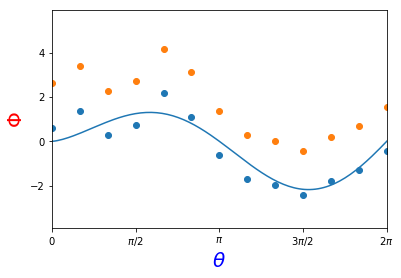

In [7]:
plt.figure()
plt.scatter(X_data , y_data)
plt.scatter(X_data , y_data  + 2.)
# Add custom labels to ticks
plt.xticks([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
# Set limits of the x axis
plt.xlim(0., 2*np.pi)
plt.xlabel(r'$\theta$', fontsize=20, color='blue')
plt.ylabel(r'$\Phi$', fontsize=20, color='red')
plt.plot(X_plot, y_plot)

plt.show()


And let's annotate some stuff, and make something transparent (I almost always use this somewhere):

In [ ]:
plt.figure()
plt.scatter(X_data , y_data)
# Alpha goes between 0 and 1, with 0 completely transparent, and 1 unchanged. 
plt.scatter(X_data , y_data  + 2., alpha = 0.2)
plt.xticks([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.xlim(0., 2*np.pi)
plt.xlabel(r'$\Theta$', fontsize=20, color='blue')
plt.ylabel(r'$\Phi$', fontsize=20, color='red')
plt.plot(X_plot, y_plot)
# You can dig into the documentation and find loads of cool arrows - but the main
# important things here are 'xy' - the x and y coords of the point of the arrow
# and 'xytext' - where to offset the annoation text to. 
plt.annotate(r'$\mathrm{Middle}$',
             xy=(np.pi, 0.), xycoords='data',
             xytext=(-60, -60), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()

Add a legend too - I've put it right in the middle right for illustration purposes, but obviously there are better places for it to go! In fact ```loc='best'``` is useful if you don't know where your data is going to be in the graph. For cases where your legned has to go over your data, you can use fancybox and transparent frames.

In [ ]:
plt.figure()
plt.scatter(X_data , y_data, label ='scatter')
# Alpha goes between 0 and 1, with 0 completely transparent, and 1 unchanged. 
plt.scatter(X_data , y_data  + 2., alpha = 0.2, label ='scatter plus 2')
plt.xticks([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.xlim(0., 2*np.pi)
plt.xlabel(r'$\Theta$', fontsize=20, color='blue')
plt.ylabel(r'$\Phi$', fontsize=20, color='red')
plt.plot(X_plot, y_plot, label ='plot')
# You can dig into the documentation and find loads of cool arrows - but the main
# important things here are 'xy' - the x and y coords of the point of the arrow
# and 'xytext' - where to offset the annoation text to. 
plt.annotate(r'$\mathrm{Middle}$',
             xy=(np.pi, 0.), xycoords='data',
             xytext=(-60, -60), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
# 'fancybox=True' and 'framealpha=0.5' are of course totally optional!
plt.legend(loc='center right', fancybox=True, framealpha=0.5)
plt.show()

In data science we often want Histograms - just use plt.hist()!

In [ ]:
samples = np.random.normal(size = 5000)
plt.figure()
# I often make my histograms a bit transparent by changing alpha.
plt.hist(samples, bins=30, alpha=0.6)
plt.show()

We can even do a 2d Histogram!

In [ ]:
# This isn't needed unless we use a log scale.
from matplotlib.colors import LogNorm

# Get samples from a multivariate Gaussian where the variables are correlated.
samples_2d = np.random.multivariate_normal(mean=[6., 12.0], cov=[[0.7, 0.3], [0.3, 0.7]], size=10000) 

x = samples_2d[:,0]
y = samples_2d[:,1]

plt.figure()
plt.hist2d(x, y, bins = 20)
# Optionally we can use a log scale:
# plt.hist2d(x, y, bins = 20, norm=LogNorm())
plt.colorbar()
plt.show()

histogram = plt.gcf()

More advanced 2d histograms here: https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/

# Subplots!

More useful stuff here: https://matplotlib.org/examples/pylab_examples/subplots_demo.html, and here: https://matplotlib.org/examples/pylab_examples/demo_tight_layout.html

The format is ```plt.subplot(#rows, #columns, which one to plot)```

In [ ]:
plt.figure()
plt.subplot(2, 1, 1)
plt.scatter(X_data , y_data)
plt.subplot(2, 1, 2)
plt.scatter(X_data , y_data)
plt.show()

In [ ]:
plt.figure()
plt.subplot(3, 1, 1)
plt.scatter(X_data , y_data)
plt.subplot(3, 1, 2)
plt.scatter(X_data , y_data + 1.)
plt.subplot(3, 1, 3)
plt.scatter(X_data , y_data - 1.)
plt.show()

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(X_data , y_data)
plt.subplot(1, 2, 2)
plt.scatter(X_data , y_data)
plt.show()

Get even more control with the axes command. The format here is ```plt.axes([bottom corner x, bottom corner y, x size, y size])```. Probably the easiest way to figure it out is to just play around with it.

In [ ]:
plt.figure()
plt.axes([0.1, 0.1, 0.8, 0.8])
plt.scatter(X_data , y_data)
plt.axes([0.5, 0.3, 0.3, 0.5])
plt.scatter(X_data, y_data)
# Just the second half of the data in my weird small plot
plt.xlim(np.pi, 2*np.pi)
plt.show()

There's a complicated, but cool zoom example in the matplotlib examples: http://matplotlib.org/examples/pylab_examples/axes_zoom_effect.html

# APIs

Matplotlib has two APIs: pyplot (we used that above - plt.plot() and so on) and the object-oriented API.

pyplot is convenient for interactive plotting, since it remembers "state", such as the last Axes that was plotted to, in order to plot the next item to it again. Useful for exploratory data analysis. But best practices is to use the object-oriented API like I do below - it gets useful when doing more complicated plots, especially when you write functions to make similiar plots for different datasets. 

In [ ]:
import numpy as np
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, LinearRegression

def f(x, noise_amount):
    y = np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise

X_data  = np.linspace(0, 2.*np.pi, 25)
y_data = f(X_data, noise_amount=0.5)

X_plot = np.linspace(-0.9, 2.*np.pi + 0.9, 250)
y_plot = f(X_plot, noise_amount=0.)

ys_store = []

for degree in range(1, 7):
    clf_poly = BayesianRidge(alpha_1=3.5)
    clf_poly.fit(np.vander(X_data, degree), y_data)
    y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
    ys_store.append((y_mean, y_std))

fig = plt.figure()

for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    y_mean, y_std = ys_store[i]
    ax.scatter(X_data, y_data, color='blue', alpha=0.7)
    ax.plot(X_plot, y_plot, 'b--', alpha = 0.3, label=r'$\mathrm{Data}$')
    degree = str(i)
    label = ' '.join([degree, r'$\mathrm{degree}$', r'$\mathrm{poly}$'])
    ax.plot(X_plot, y_mean, label=label)
    # Fill between is a very cool function - useful for showing standard deviation.
    ax.fill_between(X_plot, y_mean + y_std, y_mean - y_std, alpha=0.3)
    # This would be plt.xticks in the pyplot API.
    # Often we have to use 'ax.set_something' in the object-oriented API
    ax.set_xticks([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
    ax.set_yticks([-1, 0, +1])
    # Again - set_ylim rather than plt.ylim
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(-0.9, 2.*np.pi + 0.9)
    
plt.show()

# Styles
Matplotlib also comes with a number of "styles" which make it easy to change defaults. Try "seaborn" or "ggplot". In the example below I've also thrown in a color palette (```plt.get_cmap```) which will automatically chose nice colours for each of your new plots. 

In [ ]:
from matplotlib import style

# Use the 'seaborn' style!
style.use('seaborn')
# Use a pre-specified set of colours
palette = plt.get_cmap('Set1')
fig = plt.figure()

for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    y_mean, y_std = ys_store[i]
    ax.scatter(X_data, y_data, color='blue', alpha=0.7)
    ax.plot(X_plot, y_plot, 'b--', alpha = 0.3, label=r'$\mathrm{Data}$')
    degree = str(i)
    label = ' '.join([degree, r'$\mathrm{degree}$', r'$\mathrm{poly}$'])
    # 'color = palette(i)' below just chooses the ith colour in 'Set1'.
    ax.plot(X_plot, y_mean, color=palette(i), alpha=0.9, label=label)
    ax.fill_between(X_plot, y_mean + y_std, y_mean - y_std, alpha=0.3)
    ax.set_xticks([0., np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
    ax.set_yticks([-1, 0, +1])
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(-0.9, 2.*np.pi + 0.9)
    if i in range(4):
        ax.tick_params(labelbottom='off')
    if i not in [0,2,4]:
        ax.tick_params(labelleft='off')
    if i == 5:
        ax.annotate(r'$\mathrm{Overfitting}$',
             xy=(X_plot[-10], y_mean[-10]), xycoords='data',
             xytext=(-50, +20), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    ax.legend(loc ='lower left', fancybox=True)
    
plt.show()

You can use your own styles if you want - look at the format of styles/halloween.mplstyle, or the default ones at https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib. List of the things you can customize at: https://matplotlib.org/users/customizing.html.

If you're viewing this notebook in the future - it was nearly halloween when I made it...

In [3]:
import numpy as np
from matplotlib import style
from matplotlib import rc
import matplotlib.pyplot as plt

style.use('styles/halloween.mplstyle')

skeletons = np.random.poisson(lam=5.0, size = 5000)

first_bin = skeletons.min() 
last_bin = skeletons.max() 
# Have a bin for each integer.
bin_positions = np.arange(first_bin - 0.5, last_bin + 0.5, 1)

plt.figure()
plt.hist(skeletons, bin_positions)
# Put the ticks in the middle of the bins
plt.xticks(bin_positions + 0.5)
plt.ylabel('Frequency')
plt.xlabel('Skeletons!')
plt.tight_layout()
plt.show()

# gct stands for 'get current fig' - this returns the matplotlib object. 
# Not needed here, but will be used by plotly later on...
# (No need for this in object oriented API)
halloween = plt.gcf()

/home/asa/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


# XKCD!

In [2]:
import numpy as np
import matplotlib 
matplotlib.rcdefaults()
from matplotlib import pyplot as plt

plt.xkcd()

# Set up very scientific data
x = np.linspace(-100., 100., num=500, endpoint=True)
people = np.minimum(100., 200. * np.exp(-x * x / (2.0)))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, people)
ax.set_xlim(-100, 100.)
ax.set_xlabel('Time', size=22)
ax.set_ylabel('People having \n tea and biscuits (%)', size=22)
ax.set_xticks([-75., 0, 75.])
ax.set_xticklabels(['before', 'Wednesday 1pm', 'after'])
plt.tight_layout()
plt.savefig('cdtea.pdf')
plt.show()

# People don't read

Is this just for fun? 

(from: https://www.chrisstucchio.com/blog/2014/why_xkcd_style_graphs_are_important.html)
 

'People don't read: No one reads disclaimers, caveats, or explanations of graphs. They look at pictures. So it's important to make sure that the pictures reflect your intent.

I've tried this a number of times since discovering xkcd (in private contexts which I can't share, unfortunately) - displaying schematic data in xkcd mode and precise data in normal matplotlib style. It's actually been quite useful at reducing the odds of people interpreting schematic diagrams as something more than they are. Try it out, it might work for you too.'

# Beyond Matplotlib

# 1: Plotly

Don't like matplotlib? Try [Plotly](https://plot.ly/python/) for cool interactive graphs. A few examples: 

- [networks](https://plot.ly/python/network-graphs/) 

- [histograms](https://plot.ly/python/heatmaps-contours-and-2dhistograms-tutorial/)

Convert matplotlib to Plotly: http://nbviewer.jupyter.org/github/plotly/python-user-guide/blob/master/s6_matplotlylib/s6_matplotlylib.ipynb

In [13]:
import plotly.plotly as py
# (*) Useful Python/Plotly tools
import plotly.tools as tls
# (*) Graph objects to piece together plots
from plotly.graph_objs import *

py.iplot_mpl(halloween, strip_style=True,
             filename='halloween')

/home/asa/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans



Running this cell probably won't work because you have to sign in to your Plotly account with a credentials file: but this result is [on my account](https://plot.ly/~AsaCooperStickland/4/).

# 2: Seaborn
Attempt to buiild on Matplotlib and make it look nicer - e.g. color palettes, styles - as we've seen, a lot of this functionality has been added to Matplotlib. 

# 3. Bokeh

For visualisation in web browswers and interactvity: 'goal is to provide elegant, concise construction of basic exploratory and advanced custom graphics in the style of D3.js. I've not used this too much, but to me it seems really cool!

In [37]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
samples_2d = np.random.multivariate_normal(mean=[100., 100.0], cov=[[50.*0.7, 50.*0.3], [50.*0.3, 50.*0.7]], size=N) 

x = samples_2d[:,0]
y = samples_2d[:,1]

# Give the points random radius and color
radii = np.random.random(size=N) * 0.3
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 500) for r, g in zip(50+2*x, 30+2*y)
]

# Add some tools for interaction
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

# 4. Altair

Don't know much about this one: wants to be a more declaritive language for visualisation. 
https://altair-viz.github.io/

# 5. VisPy
Fast, scalable - for when you want to plot a million points!

# Conclusion + Further Reading

- Loads of examples at the [Matplotlib gallery](http://matplotlib.org/gallery.html) and (I think even more usefully) in the [Python graph gallery](https://python-graph-gallery.com/).
- [This](https://www.youtube.com/watch?v=tWHiUk7PRyw) talk with github repo: https://github.com/dmcdougall/strata-mpl-tutorial